## ローパスフィルタ比較

入力$f(t)$
出力$y(t)$

### 偏差積分
$$
\begin{aligned}
e_k &= f_k - y_{k-1} \\
y_k &= y_{k-1} + \frac{1}{\tau}e_k \\
\end{aligned}
$$

### 一時遅れ
$$
\begin{aligned}
連続 \\
y &= 1 - e^{\frac{t}{\tau}} \\
離散 \\
y_k &= \tau y_{k-1} + (1 - \tau) f_k \\
\end{aligned}
$$

### 移動平均
$$
\begin{aligned}
y_k &= \frac{1}{3} (f_{k-2} + f_{k-1} + f_k) \\
\end{aligned}
$$

### 中央値
$$
\begin{aligned}
y_k &= \operatorname{med}(f_{k-2}, f_{k-1}, f_k) \\
\end{aligned}
$$

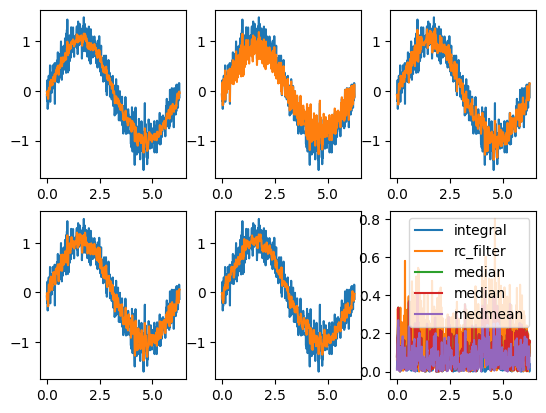

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# モデル設定
dt = 10e-3 # 制御周期(100Hz = 10ms)
t = np.arange(0, 2*np.pi, dt) # 時間(グラフの横軸) 0~10まで

# 入力 sin波+ノイズ
f = np.sin(t) + np.random.normal(0, 0.2, len(t))

# シミュレーション
integral = np.zeros_like(t)
rc_filter = np.zeros_like(t)
median = np.zeros_like(t)
mean = np.zeros_like(t)
medmean = np.zeros_like(t)

def mmfilter(arr):
  arr.remove(max(arr))
  arr.remove(min(arr))
  return np.mean(arr)

alfa = 0.2 # 時定数
for i in range(len(t)):
  integral[i] = integral[i-1] + (f[i] - integral[i-1]) / 4
  rc_filter[i] = alfa * rc_filter[i] + (1 - alfa) * f[i]
  median[i] = np.median([f[i-2], f[i-1], f[i]])
  mean[i] = np.mean([f[i-2], f[i-1], f[i]])
  medmean[i] = mmfilter([f[i-4], f[i-3], f[i-2], f[i-1], f[i]])

error = [
  ["integral", np.abs(np.sin(t) - integral)],
  ["rc_filter", np.abs(np.sin(t) - rc_filter)],
  ["median", np.abs(np.sin(t) - median)],
  ["median", np.abs(np.sin(t) - median)],
  ["medmean", np.abs(np.sin(t) - medmean)],
]

fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.plot(t, f, label='Input')
ax2.plot(t, f, label='Input')
ax3.plot(t, f, label='Input')
ax4.plot(t, f, label='Input')
ax5.plot(t, f, label='Input')

ax1.plot(t, integral, label='Integral')
ax2.plot(t, rc_filter, label='RC Filter')
ax3.plot(t, median, label='Median')
ax4.plot(t, mean, label='Mean')
ax5.plot(t, medmean, label='medmean')
for e in error:
  ax6.plot(t, e[1], label=e[0])

# plt.xlabel('Time[s]')
# ax1.legend()
# ax2.legend()
# ax3.legend()
# ax4.legend()
# ax5.legend()
ax6.legend()
plt.show()
